# Emukit Bayesian Optimization Benchmark

This notebook uses the `emukit.benchmarking` package to compare two Bayesian optimization methods against each other, using the Branin test function.

In [1]:
import emukit
import numpy as np

## Set up test function

We use the Branin function which is already included in Emukit, both the function and the appropriate input domain are ready made for us.

In [2]:
from emukit.test_functions.branin import branin_function
branin_fcn, parameter_space = branin_function()

## Set up methods to test

We compare Bayesian optimization using different models. All the methods collect points one at a time in a sequential fashion and use the expected improvement acquisition function. The models we test are:
- A Gaussian process with Matern52 covariance function
- Random forest using the pyrfr package

We choose to create lambda functions with a consistent interface that return an instance of a loop with a given initial data set.

In [3]:
from emukit.examples.gp_bayesian_optimization.enums import ModelType, AcquisitionType
from emukit.examples.gp_bayesian_optimization.optimization_loops import create_bayesian_optimization_loop
from emukit.examples.gp_bayesian_optimization.single_objective_bayesian_optimization import GPBayesianOptimization

loops = [
    ('Random Forest', lambda loop_state: create_bayesian_optimization_loop(loop_state.X, loop_state.Y, parameter_space, AcquisitionType.EI, 
                                                                     ModelType.RandomForest)),
    ('Gaussian Process', lambda loop_state: GPBayesianOptimization(parameter_space.parameters, loop_state.X, loop_state.Y, 
                                                             acquisition_type=AcquisitionType.EI, noiseless=True))
]

# Run benchmark

A total of 10 initial data sets are generated of 5 observations that are randomly sampled from the input domain. For every intial data set, each method is run for 30 optimization iterations. The Gaussian process model has its hyper-parameters optimized after each function observation whereas the other models have fixed hyper-parameters.

In [4]:
from emukit.benchmarking.loop_benchmarking.benchmarker import Benchmarker
from emukit.benchmarking.loop_benchmarking.metrics import MinimumObservedValueMetric, TimeMetric
n_repeats = 10
n_initial_data = 5
n_iterations = 20

metrics = [MinimumObservedValueMetric(), TimeMetric()]

benchmarkers = Benchmarker(loops, branin_fcn, parameter_space, metrics=metrics)
benchmark_results = benchmarkers.run_benchmark(n_iterations=n_iterations, n_initial_data=n_initial_data, 
                                               n_repeats=n_repeats)

 /Users/marpulli/miniconda3/lib/python3.6/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Optimization restart 1/1, f = 25.5470322184274
Optimization restart 1/1, f = 30.18602300697501
Optimization restart 1/1, f = 34.77383975972789
Optimization restart 1/1, f = 39.27579970545233
Optimization restart 1/1, f = 45.279742126096316
Optimization restart 1/1, f = 49.83452548159511
Optimization restart 1/1, f = 57.71211096023106
Optimization restart 1/1, f = 63.408489237767775
Optimization restart 1/1, f = 69.7657648537998
Optimization restart 1/1, f = 74.11705706387997
Optimization restart 1/1, f = 78.169700702114
Optimization restart 1/1, f = 82.92986833538372
Optimization restart 1/1, f = 85.96840421184503
Optimization restart 1/1, f = 88.60100124126319
Optimization restart 1/1, f = 91.58237562375848
Optimization restart 1/1, f = 93.91219523954564
Optimization restart 1/1, f = 97.81334922272859
Optimization restart 1/1, f = 99.80933787223913
Optimization restart 1/1, f = 99.64355892771789
Optimization restart 1/1, f = 103.58354723380539
Optimization restart 1/1, f = 106.3609141

 /Users/marpulli/miniconda3/lib/python3.6/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Optimization restart 1/1, f = 27.836530536242154
Optimization restart 1/1, f = 32.90842811940668
Optimization restart 1/1, f = 37.829132482846155
Optimization restart 1/1, f = 43.41402878466789
Optimization restart 1/1, f = 49.399509158910774
Optimization restart 1/1, f = 54.055567768906336
Optimization restart 1/1, f = 59.02852439781061
Optimization restart 1/1, f = 62.643812804139614
Optimization restart 1/1, f = 66.20945944351806
Optimization restart 1/1, f = 68.73018663314333
Optimization restart 1/1, f = 74.19681739131704
Optimization restart 1/1, f = 78.61873598586246
Optimization restart 1/1, f = 82.52788425607052
Optimization restart 1/1, f = 86.18976628665932
Optimization restart 1/1, f = 89.33489501677641
Optimization restart 1/1, f = 91.5829744818464
Optimization restart 1/1, f = 91.9886851447681
Optimization restart 1/1, f = 96.48998261888111
Optimization restart 1/1, f = 98.24387224885808
Optimization restart 1/1, f = 100.45961016133991
Optimization restart 1/1, f = 100.69

 /Users/marpulli/miniconda3/lib/python3.6/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 /Users/marpulli/miniconda3/lib/python3.6/site-packages/GPy/kern/src/stationary.py:551: RuntimeWarning:invalid value encountered in multiply
 /Users/marpulli/miniconda3/lib/python3.6/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Optimization restart 1/1, f = 9544.951010929284
Optimization restart 1/1, f = 33.11222834217144
Optimization restart 1/1, f = 38.55967077332465
Optimization restart 1/1, f = 43.874377933891004
Optimization restart 1/1, f = 49.035984917501246
Optimization restart 1/1, f = 53.98493197355749
Optimization restart 1/1, f = 58.86089856623372
Optimization restart 1/1, f = 63.74302430235618
Optimization restart 1/1, f = 68.5494755670191
Optimization restart 1/1, f = 74.36117580422368
Optimization restart 1/1, f = 83.93138680051584
Optimization restart 1/1, f = 89.01206854101929
Optimization restart 1/1, f = 94.151482205532
Optimization restart 1/1, f = 99.18630445546243
Optimization restart 1/1, f = 104.4463153879492
Optimization restart 1/1, f = 109.55975581227881
Optimization restart 1/1, f = 114.6545440311893
Optimization restart 1/1, f = 119.84711215594932
Optimization restart 1/1, f = 124.84692225463206
Optimization restart 1/1, f = 129.80964666855542
Optimization restart 1/1, f = 134.717

 /Users/marpulli/miniconda3/lib/python3.6/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Optimization restart 1/1, f = 30.92053671806591
Optimization restart 1/1, f = 36.69270045163513
Optimization restart 1/1, f = 43.08722928307922
Optimization restart 1/1, f = 48.715209249496965
Optimization restart 1/1, f = 54.286887711716986
Optimization restart 1/1, f = 59.803021607999256
Optimization restart 1/1, f = 66.2233554897513
Optimization restart 1/1, f = 71.9812271059596
Optimization restart 1/1, f = 77.46091424321678
Optimization restart 1/1, f = 83.38949983420338
Optimization restart 1/1, f = 89.60768556125919
Optimization restart 1/1, f = 95.1629006854754
Optimization restart 1/1, f = 100.76361859376455
Optimization restart 1/1, f = 106.52139919058997
Optimization restart 1/1, f = 111.93813235050817
Optimization restart 1/1, f = 117.37820437452115
Optimization restart 1/1, f = 122.75696431620712
Optimization restart 1/1, f = 128.2323914159556
Optimization restart 1/1, f = 133.65744709181175
Optimization restart 1/1, f = 140.11226634708146
Optimization restart 1/1, f = 145

 /Users/marpulli/miniconda3/lib/python3.6/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Optimization restart 1/1, f = 24.926239367637073
Optimization restart 1/1, f = 29.913296272043123
Optimization restart 1/1, f = 36.40558699733244
Optimization restart 1/1, f = 39.755142756692116
Optimization restart 1/1, f = 42.30143913670721
Optimization restart 1/1, f = 45.76437651352971
Optimization restart 1/1, f = 51.092407564899396
Optimization restart 1/1, f = 51.56237750314517
Optimization restart 1/1, f = 58.76811619248467
Optimization restart 1/1, f = 61.27656211334025
Optimization restart 1/1, f = 74.73919587850997
Optimization restart 1/1, f = 80.01867352379257
Optimization restart 1/1, f = 85.40327410380777
Optimization restart 1/1, f = 89.86188181282293
Optimization restart 1/1, f = 95.08032579388646
Optimization restart 1/1, f = 98.88943241524956
Optimization restart 1/1, f = 101.24537117205169
Optimization restart 1/1, f = 104.9755892125606
Optimization restart 1/1, f = 107.61680321317989
Optimization restart 1/1, f = 110.91854725680273
Optimization restart 1/1, f = 111

 /Users/marpulli/miniconda3/lib/python3.6/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1
 /Users/marpulli/miniconda3/lib/python3.6/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 /Users/marpulli/miniconda3/lib/python3.6/site-packages/GPy/kern/src/stationary.py:551: RuntimeWarning:invalid value encountered in multiply


Optimization restart 1/1, f = 29.96298353733568
Optimization restart 1/1, f = 37.249215187449884
Optimization restart 1/1, f = 42.91909088008915
Optimization restart 1/1, f = 48.532597903827494
Optimization restart 1/1, f = 54.1446432053736
Optimization restart 1/1, f = 60.14691407338602
Optimization restart 1/1, f = 65.67118597812556
Optimization restart 1/1, f = 71.11961655740332
Optimization restart 1/1, f = 76.76292595953933
Optimization restart 1/1, f = 82.20992167870186
Optimization restart 1/1, f = 87.56808924936279
Optimization restart 1/1, f = 92.95694214755117
Optimization restart 1/1, f = 98.93600257416028
Optimization restart 1/1, f = 104.4084100233467
Optimization restart 1/1, f = 109.724946676732
Optimization restart 1/1, f = 115.00143433135455
Optimization restart 1/1, f = 120.24280058416423
Optimization restart 1/1, f = 125.46470779313925
Optimization restart 1/1, f = 133.22298624333274
Optimization restart 1/1, f = 138.5372081772901
Optimization restart 1/1, f = 144.65

 /Users/marpulli/miniconda3/lib/python3.6/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Optimization restart 1/1, f = 26.575601087566117
Optimization restart 1/1, f = 32.882870535059155
Optimization restart 1/1, f = 39.64984328991697
Optimization restart 1/1, f = 44.81791618813332
Optimization restart 1/1, f = 49.55289494562957
Optimization restart 1/1, f = 53.354402993778244
Optimization restart 1/1, f = 57.05562740268452
Optimization restart 1/1, f = 61.23118396014632
Optimization restart 1/1, f = 63.25210324172785
Optimization restart 1/1, f = 69.52071043115944
Optimization restart 1/1, f = 73.74848204855833
Optimization restart 1/1, f = 77.4845766740822
Optimization restart 1/1, f = 81.03469008861182
Optimization restart 1/1, f = 84.4996009910425
Optimization restart 1/1, f = 88.0458898303127
Optimization restart 1/1, f = 89.261498681588
Optimization restart 1/1, f = 89.56680784205768
Optimization restart 1/1, f = 96.42141147932134
Optimization restart 1/1, f = 100.59401742441104
Optimization restart 1/1, f = 102.80819544622007
Optimization restart 1/1, f = 104.710194

 /Users/marpulli/miniconda3/lib/python3.6/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Optimization restart 1/1, f = 27.178649001856684
Optimization restart 1/1, f = 37.415794323314486
Optimization restart 1/1, f = 43.26418855844944
Optimization restart 1/1, f = 48.872994259096686
Optimization restart 1/1, f = 53.83731211803996
Optimization restart 1/1, f = 57.783948361046924
Optimization restart 1/1, f = 60.77223324212782
Optimization restart 1/1, f = 64.4436095152125
Optimization restart 1/1, f = 65.16229040765003
Optimization restart 1/1, f = 71.78572805999839
Optimization restart 1/1, f = 76.60495077043707
Optimization restart 1/1, f = 81.70045595631865
Optimization restart 1/1, f = 84.96136412986264
Optimization restart 1/1, f = 88.70311744957556
Optimization restart 1/1, f = 91.28128842590583
Optimization restart 1/1, f = 93.0605235566763
Optimization restart 1/1, f = 95.63102946259838
Optimization restart 1/1, f = 101.19406888194794
Optimization restart 1/1, f = 104.40000126195085
Optimization restart 1/1, f = 107.21250954835983
Optimization restart 1/1, f = 109.1

 /Users/marpulli/miniconda3/lib/python3.6/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Optimization restart 1/1, f = 24.674982462585003
Optimization restart 1/1, f = 30.070259172446303
Optimization restart 1/1, f = 35.345858923294124
Optimization restart 1/1, f = 40.200028900585025
Optimization restart 1/1, f = 44.56369222774292
Optimization restart 1/1, f = 48.946279457293315
Optimization restart 1/1, f = 54.49337184317026
Optimization restart 1/1, f = 59.02063493565577
Optimization restart 1/1, f = 61.91197330591243
Optimization restart 1/1, f = 64.12015151976517
Optimization restart 1/1, f = 69.32330834826864
Optimization restart 1/1, f = 73.07321233995994
Optimization restart 1/1, f = 75.30464397830737
Optimization restart 1/1, f = 76.83715778036525
Optimization restart 1/1, f = 76.8423213499019
Optimization restart 1/1, f = 75.9024873188911
Optimization restart 1/1, f = 79.35770020247777
Optimization restart 1/1, f = 77.25854674180363
Optimization restart 1/1, f = 74.96637374073114
Optimization restart 1/1, f = 76.30689067193683
Optimization restart 1/1, f = 73.9402

 /Users/marpulli/miniconda3/lib/python3.6/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Optimization restart 1/1, f = 25.42688527703912
Optimization restart 1/1, f = 30.274838621096944
Optimization restart 1/1, f = 35.734871694265436
Optimization restart 1/1, f = 40.12792530119823
Optimization restart 1/1, f = 44.55455953151398
Optimization restart 1/1, f = 49.10885504790364
Optimization restart 1/1, f = 53.296560845020274
Optimization restart 1/1, f = 61.78311343176486
Optimization restart 1/1, f = 66.67700703232029
Optimization restart 1/1, f = 77.955235089316
Optimization restart 1/1, f = 82.40009097199221
Optimization restart 1/1, f = 86.96416384747147
Optimization restart 1/1, f = 90.83100786910975
Optimization restart 1/1, f = 94.52319316563272
Optimization restart 1/1, f = 97.66059573672568
Optimization restart 1/1, f = 99.74513928678118
Optimization restart 1/1, f = 104.926547510068
Optimization restart 1/1, f = 108.61085238102743
Optimization restart 1/1, f = 110.15468800248559
Optimization restart 1/1, f = 113.02443993093505
Optimization restart 1/1, f = 114.019

# Plot results

Plot the results of each method against each other. The plot shows the average value and standard deviation of the lowest observed value up to the given iteration.

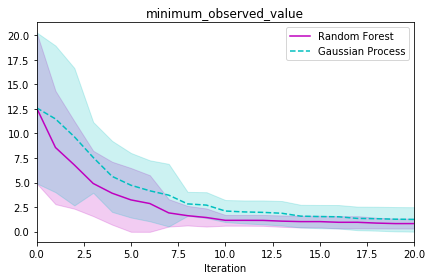

In [5]:
from emukit.benchmarking.loop_benchmarking.benchmark_plot import BenchmarkPlot
colours = ['m', 'c']
line_styles = ['-', '--']

metrics_to_plot = ['minimum_observed_value']
plots = BenchmarkPlot(benchmark_results, loop_colours=colours, loop_line_styles=line_styles, 
                      metrics_to_plot=metrics_to_plot)
plots.make_plot()

# Plot results against time

Using the `TimeMetric` object above, the time taken to complete each iteration of the loops was recorded. Here we plot the minimum observed value against the time taken.

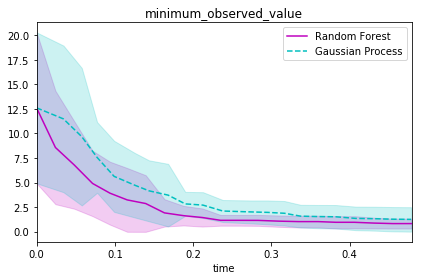

In [6]:
# Plot against time
plots = BenchmarkPlot(benchmark_results, loop_colours=colours, loop_line_styles=line_styles, 
                      x_axis_metric_name='time')
plots.make_plot()

# Conclusion

We have shown how to use Emukit to benchmark different methods against each other for Bayesian optimziation. This methodology can easily be expanded to more loops using different models and acquisition functions.